In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

files = []
fill_colors = ['lightblue', 'orange', 'lightgreen', 'plum']
outline_colors = ['blue', 'red', 'green', 'purple']

## Preprocesssing

#### Slurm worker node clean image

In [207]:
data_sources = []
for file in files:
    df = pd.read_csv(file)
    for column in df.columns[1:]:
        df[column] = pd.to_datetime(df[column])

    df["cloud-init-exec-time"] = (df["cloud_init_end"] - df["kernel_start"]).dt.total_seconds()
    df["provision-time"] = (df["provision_end"] - df["provision_start"]).dt.total_seconds()
    df["deprovision-time"] = (df["deprovision_end"] - df["deprovision_start"]).dt.total_seconds()
    data_sources.append(df)

## Provision

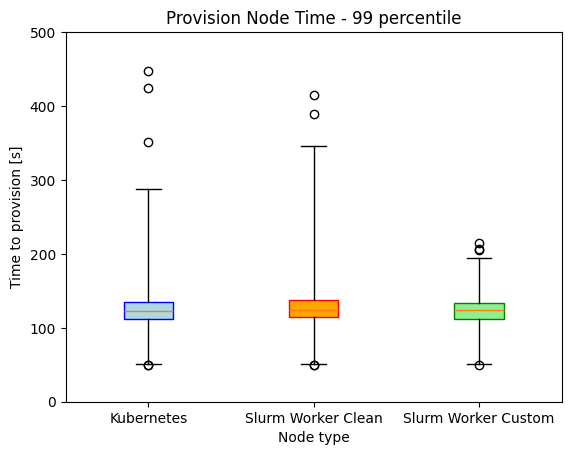

In [249]:
box = plt.boxplot([data_sources[0]["provision-time"], data_sources[1]["provision-time"], data_sources[2]["provision-time"]], vert=True, patch_artist=True, whis=[1, 99])

# Set colors for each box
for patch, color, outline in zip(box['boxes'], fill_colors, outline_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(outline)  # Set edge color if needed


plt.title('Provision Node Time - 99 percentile')
plt.xlabel('Node type')
plt.ylabel('Time to provision [s]')
plt.xticks([1, 2, 3], ['Kubernetes', 'Slurm Worker Clean', 'Slurm Worker Custom'])
plt.ylim(0,500)

plt.show()


## Cloud Init

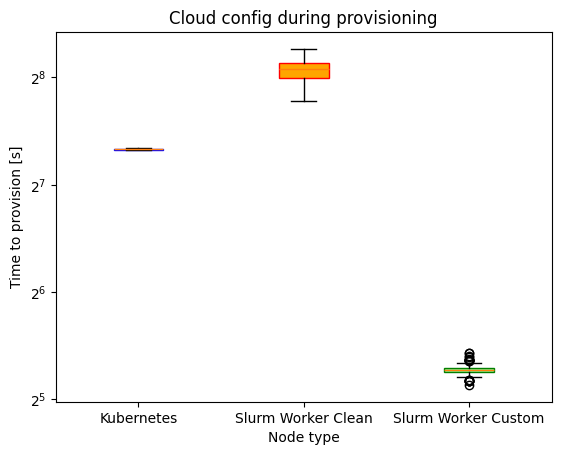

In [240]:
box = plt.boxplot([data_sources[0]["cloud-init-exec-time"], data_sources[1]["cloud-init-exec-time"], data_sources[2]["cloud-init-exec-time"]], vert=True, patch_artist=True)

# Set colors for each box
for patch, color, outline in zip(box['boxes'], fill_colors, outline_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(outline)  # Set edge color if needed

plt.title('Cloud config during provisioning')
plt.xlabel('Node type')
plt.ylabel('Time to provision [s]')
plt.xticks([1, 2, 3], ['Kubernetes', 'Slurm Worker Clean', 'Slurm Worker Custom'])
plt.yscale("log", base=2)

plt.show()


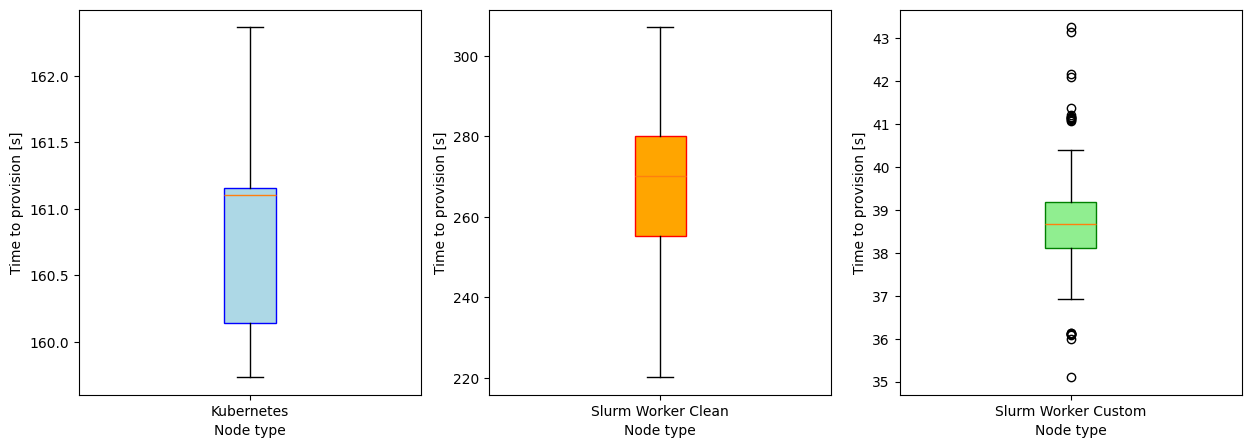

In [241]:
# Create a box plot for each data source
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, data in enumerate(data_sources):
    box = ax[i].boxplot(
        data["cloud-init-exec-time"],
        vert=True,
        patch_artist=True
    )
    
    # Set colors for each box
    for patch, color, outline in zip(box['boxes'], [fill_colors[i]], [outline_colors[i]]):
        patch.set_facecolor(color)
        patch.set_edgecolor(outline)

    # Set title and labels
    ax[i].set_xlabel('Node type')
    ax[i].set_ylabel('Time to provision [s]')
    ax[i].set_xticks([1], {["Kubernetes", "Slurm Worker Clean", "Slurm Worker Custom"][i]})  # Only one box, so only one tick

# Show the plot
plt.show()

## Deprovision

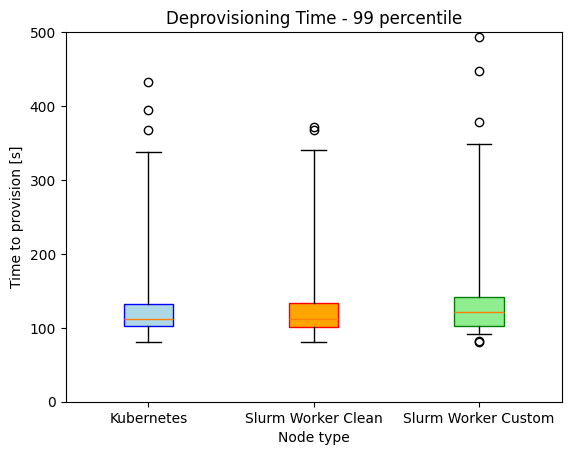

In [ ]:
box = plt.boxplot([data_sources[0]["deprovision-time"], data_sources[1]["deprovision-time"], data_sources[2]["deprovision-time"]], vert=True, patch_artist=True, whis=[5, 95])

# Set colors for each box
for patch, color, outline in zip(box['boxes'], fill_colors, outline_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(outline)  # Set edge color if needed

plt.title('Deprovisioning Time - 95 percentile')
plt.xlabel('Node type')
plt.ylabel('Time to provision [s]')
plt.xticks([1, 2, 3], ['Kubernetes', 'Slurm Worker Clean', 'Slurm Worker Custom'])
plt.ylim(0, 500)
plt.show()